# COVID
### FONTE

Presidenza del Consiglio dei Ministri - Dipartimento della Protezione Civile

https://github.com/pcm-dpc

In [188]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
#data=pd.read_csv('dpc-covid19-ita-province.csv')
link_dpcprovince = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv'
data=pd.read_csv(link_dpcprovince)

data['data']=pd.to_datetime(data['data'])
data['data']=data['data'].dt.normalize()
data['index1'] = data.index
data = data[['index1','data','stato','denominazione_regione','codice_provincia','denominazione_provincia','sigla_provincia','totale_casi']]

#data

### DATI LOMBARDIA

In [189]:
#DATI LOMBARDIA
lombardia = data.loc[data['denominazione_regione'] == 'Lombardia']
#FILTRO PER DATA
lombardia = lombardia.loc[data['data'] >= '2020-01-01']
#CLEAN
lombardia.loc[lombardia['denominazione_provincia']== 'In fase di definizione/aggiornamento','denominazione_provincia'] = np.nan
lombardia = lombardia.dropna(subset = ['denominazione_provincia'])
lombardia = lombardia[['data','denominazione_provincia','totale_casi']]
lombardia = lombardia.replace('Monza e della Brianza','Monza Brianza')
lombardia = lombardia.replace('Fuori Regione / Provincia Autonoma','Provincia Autonoma')
#lombardia

In [190]:
#l2=lombardia.pivot(index='data',columns='denominazione_provincia',values='totale_casi')
l2=lombardia.set_index(['data','denominazione_provincia']).totale_casi.unstack()
l2=l2.diff(axis=0)
l2=l2.fillna(0)
#l2.head()

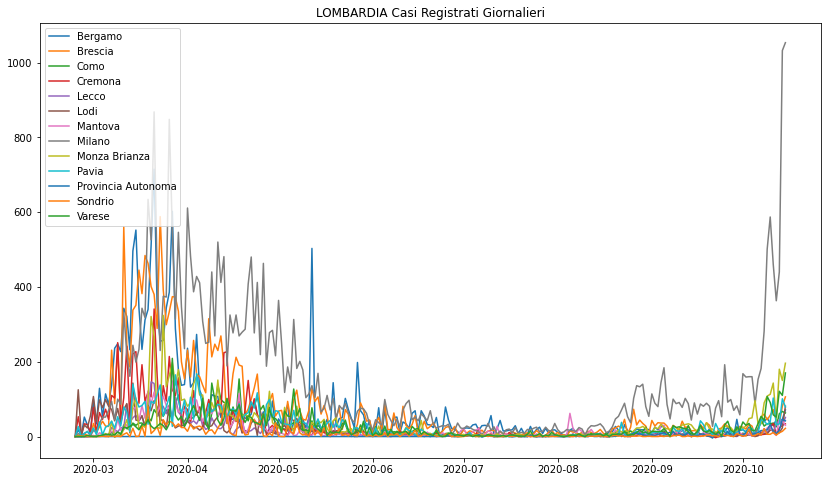

In [191]:
#PLOT DAILY
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(l2.index,l2.values)

#ax.stackplot(lombardia2.index,lombardia2.values.T)

plt.title('LOMBARDIA Casi Registrati Giornalieri')
ax.legend(labels=l2.columns, loc='upper left')
plt.show()
    

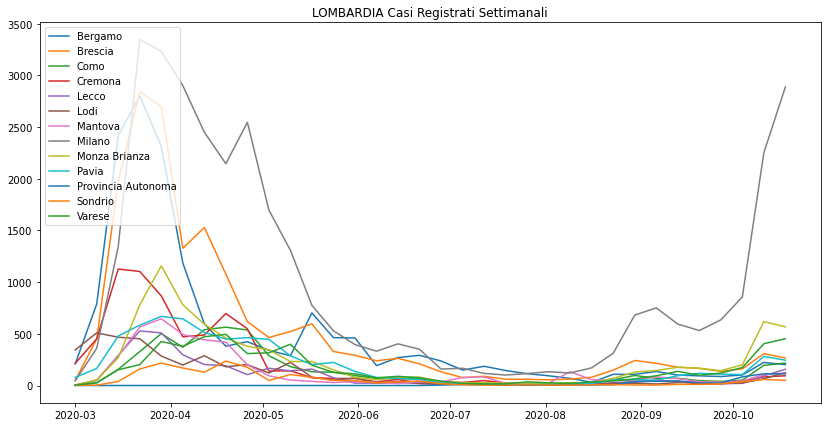

In [192]:
#PLOT WEEKLY
#raggruppa per settimana
l3=l2.resample('W').sum()

fig, ax = plt.subplots(figsize=(14,7))

ax.plot(l3.index,l3.values)

#ax.stackplot(lombardia2.index,lombardia2.values.T)

plt.title('LOMBARDIA Casi Registrati Settimanali')
ax.legend(labels=l2.columns, loc='upper left')
plt.show()

### DATI ITALIA

In [193]:
#DATI ITALIA
#CLEAN
italia = data
italia.loc[italia['denominazione_provincia']== 'In fase di definizione/aggiornamento','denominazione_provincia'] = np.nan
italia = italia.dropna(subset = ['denominazione_provincia'])
italia = italia[['data','denominazione_regione','totale_casi']]
italia = italia.groupby(['denominazione_regione','data'])['totale_casi'].sum().reset_index()
italia = italia.loc[italia['data'] >= '2020-08-01']
#italia

In [194]:
#RAGGRUPPA PER REGIONE
regione = {}
for i in italia['denominazione_regione'].unique():
    regione[i] = italia[italia['denominazione_regione'] == i]
    #trova l'incremento giornaliero e non il progressivo
    regione[i]['daily']=regione[i]['totale_casi'].diff()
    regione[i]=regione[i].groupby(['denominazione_regione', pd.Grouper(key='data', freq='W')])['daily'].sum().reset_index()
#regione

<ipython-input-194-16e346669a13>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regione[i]['daily']=regione[i]['totale_casi'].diff()


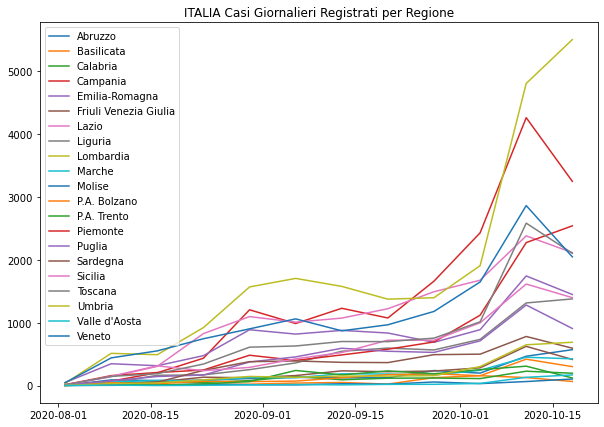

In [195]:
fig, ax = plt.subplots(figsize=(10,7))

for i in regione:
    ax.plot(regione[i]['data'],regione[i]['daily'],label=i)

    #ax.stackplot(provincia[i]['data'],provincia[i]['daily'],alpha=0.25)

plt.title('ITALIA Casi Giornalieri Registrati per Regione')
ax.legend()
plt.show()

<ipython-input-184-7b5ed4368e12>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincia[i]['daily']=provincia[i]['totale_casi'].diff()


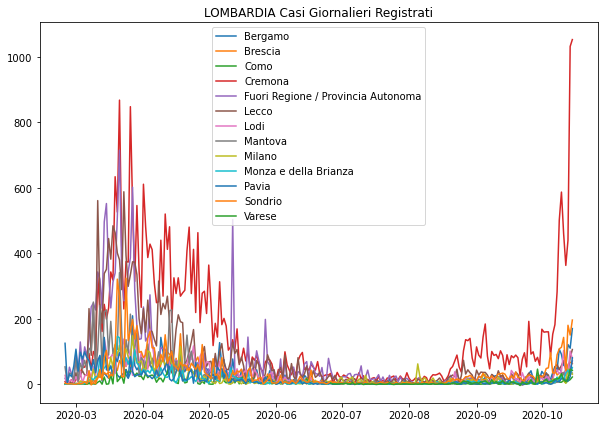

In [184]:
#OLD_RAGGRUPPA PER PROVINCE
provincia = {}
for i in lombardia['denominazione_provincia'].unique():
    provincia[i] = lombardia[lombardia['denominazione_provincia'] == i]
#trova l'incremento giornaliero e non il progressivo
    provincia[i]['daily']=provincia[i]['totale_casi'].diff()
#raggruppa per settimana e resetta indice
    #provincia[i]=provincia[i].groupby(['denominazione_provincia', pd.Grouper(key='data', freq='W')])['daily'].sum().reset_index()
    
#PLOT
fig, ax = plt.subplots(figsize=(10,7))
for i in provincia:
    ax.plot(provincia[i]['data'],provincia[i]['daily'],label=i)
    
plt.title('LOMBARDIA Casi Giornalieri Registrati')
ax.legend(labels=lombardia2.columns)
plt.show()